In [31]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Conv2D, MaxPooling2D, Dropout, Dense
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

In [32]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [33]:
print(type(X_train), type(y_train), type(X_test), type(y_test))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [34]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [35]:
index = 0
X_train[index]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

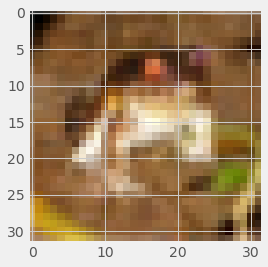

In [36]:
img = plt.imshow(X_train[0])

In [37]:
print('Image Label : ', y_train[0])

Image Label :  [6]


In [38]:
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [39]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [40]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [41]:
X_train.shape

(50000, 32, 32, 3)

In [42]:
# Normalize pixel values between 0 and 1

X_train = X_train / 255.0
X_test = X_test / 255.0


In [43]:
X_train.shape

(50000, 32, 32, 3)

In [44]:
# model = Sequential()

# model.add(Conv2D(32, (5, 5), activation = 'relu', input_shape = (32, 32, 3)))

# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(32, (5, 5), activation = 'relu'))

# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add( Flatten())

# model.add(Dense(1000, activation = 'relu'))

# model.add(Dropout(0.5))

# model.add(Dense(500, activation = 'relu'))

# model.add(Dropout(0.5))

# model.add(Dense(250, activation = 'relu'))

# model.add(Dense(10, activation = 'softmax'))

In [45]:
# model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [46]:
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2)]
# , callbacks = callback

In [47]:
# hist = model.fit(X_train, y_train_one_hot, batch_size = 32, epochs = 30, validation_split = 0.2)


In [48]:
labelNames = "1234567890"

In [49]:
# import the necessary packages
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import add
from tensorflow.keras.regularizers import l2
from tensorflow.keras import backend as K

class ResNet:
	@staticmethod
	def residual_module(data, K, stride, chanDim, red=False,
		reg=0.0001, bnEps=2e-5, bnMom=0.9):
		# the shortcut branch of the ResNet module should be
		# initialize as the input (identity) data
		shortcut = data

		# the first block of the ResNet module are the 1x1 CONVs
		bn1 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(data)
		act1 = Activation("relu")(bn1)
		conv1 = Conv2D(int(K * 0.25), (1, 1), use_bias=False,
			kernel_regularizer=l2(reg))(act1)

		# the second block of the ResNet module are the 3x3 CONVs
		bn2 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(conv1)
		act2 = Activation("relu")(bn2)
		conv2 = Conv2D(int(K * 0.25), (3, 3), strides=stride,
			padding="same", use_bias=False,
			kernel_regularizer=l2(reg))(act2)

		# the third block of the ResNet module is another set of 1x1
		# CONVs
		bn3 = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(conv2)
		act3 = Activation("relu")(bn3)
		conv3 = Conv2D(K, (1, 1), use_bias=False,
			kernel_regularizer=l2(reg))(act3)

		# if we are to reduce the spatial size, apply a CONV layer to
		# the shortcut
		if red:
			shortcut = Conv2D(K, (1, 1), strides=stride,
				use_bias=False, kernel_regularizer=l2(reg))(act1)

		# add together the shortcut and the final CONV
		x = add([conv3, shortcut])

		# return the addition as the output of the ResNet module
		return x

	@staticmethod
	def build(width, height, depth, classes, stages, filters,
		reg=0.0001, bnEps=2e-5, bnMom=0.9, dataset="cifar"):
		# initialize the input shape to be "channels last" and the
		# channels dimension itself
		inputShape = (height, width, depth)
		chanDim = -1

		# if we are using "channels first", update the input shape
		# and channels dimension
		if K.image_data_format() == "channels_first":
			inputShape = (depth, height, width)
			chanDim = 1

		# set the input and then apply a BN followed by CONV
		inputs = Input(shape=inputShape)
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(inputs)
		x = Conv2D(filters[0], (3, 3), use_bias=False,
			padding="same", kernel_regularizer=l2(reg))(x)

		# loop over the number of stages
		for i in range(0, len(stages)):
			# initialize the stride, then apply a residual module
			# used to reduce the spatial size of the input volume
			stride = (1, 1) if i == 0 else (2, 2)
			x = ResNet.residual_module(x, filters[i + 1], stride,
				chanDim, red=True, bnEps=bnEps, bnMom=bnMom)

			# loop over the number of layers in the stage
			for j in range(0, stages[i] - 1):
				# apply a ResNet module
				x = ResNet.residual_module(x, filters[i + 1],
					(1, 1), chanDim, bnEps=bnEps, bnMom=bnMom)

		# apply BN => ACT => POOL
		x = BatchNormalization(axis=chanDim, epsilon=bnEps,
			momentum=bnMom)(x)
		x = Activation("relu")(x)
		x = AveragePooling2D((8, 8))(x)

		# softmax classifier
		x = Flatten()(x)
		x = Dense(classes, kernel_regularizer=l2(reg))(x)
		x = Activation("softmax")(x)

		# create the model
		model = Model(inputs, x, name="resnet")

		# return the constructed network architecture
		return model

In [50]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [51]:
data = np.vstack([X_train, X_test])
labels = np.vstack([y_train, y_test])

In [52]:
data.shape

(60000, 32, 32, 3)

In [53]:
labels.shape

(60000, 1)

In [54]:

import matplotlib
matplotlib.use("Agg")

# from pyimagesearch.models import ResNet
# from pyimagesearch.az_dataset import load_mnist_dataset
# from pyimagesearch.az_dataset import load_az_dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

from sklearn.preprocessing import LabelBinarizer # One hot encoding the integers (ASCII) ???
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from imutils import build_montages # build a montage image of multiple images


import matplotlib.pyplot as plt

import numpy as np

import argparse

import cv2 # OpenCV
from google.colab.patches import cv2_imshow

EPOCHS = 50
INIT_LR = 1e-1
BS = 128

In [55]:
data = data / 255.0

In [56]:
# convert the labels from integers to vectors
le = LabelBinarizer()
labels = le.fit_transform(labels)
counts = labels.sum(axis=0)

# account for skew in the labeled data
classTotals = labels.sum(axis=0)
classWeight = {}

# loop over all classes and calculate the class weight
for i in range(0, len(classTotals)):
	classWeight[i] = classTotals.max() / classTotals[i]

# partition the data into training and testing splits using 80% of
# the data for training and the remaining 20% for testing
(trainX, testX, trainY, testY) = train_test_split(data,labels, test_size=0.20, random_state=42)

aug = ImageDataGenerator(
	rotation_range=10,
	zoom_range=0.05,
	width_shift_range=0.1,
	height_shift_range=0.1,
	shear_range=0.15,
	horizontal_flip=False,
	fill_mode="nearest")

print("[INFO] compiling model...")
opt = SGD(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model = ResNet.build(32, 32, 3, len(le.classes_), (3, 3, 3),
	(64, 64, 128, 256), reg=0.0005)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

# train the network
print("[INFO] training network...")
H = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	validation_data=(testX, testY),
	steps_per_epoch=len(trainX) // BS,
	epochs=EPOCHS,
	class_weight=classWeight,
	verbose=1)

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


[INFO] training network...
Epoch 1/50
375/375 [==============================] - 37s 91ms/step - loss: 1.8456 - accuracy: 0.3823 - val_loss: 1.6644 - val_accuracy: 0.4564
Epoch 2/50
375/375 [==============================] - 34s 90ms/step - loss: 1.5542 - accuracy: 0.5019 - val_loss: 1.6051 - val_accuracy: 0.4931
Epoch 3/50
375/375 [==============================] - 33s 89ms/step - loss: 1.4373 - accuracy: 0.5480 - val_loss: 1.4422 - val_accuracy: 0.5417
Epoch 4/50
375/375 [==============================] - 33s 89ms/step - loss: 1.3647 - accuracy: 0.5754 - val_loss: 1.3486 - val_accuracy: 0.5819
Epoch 5/50
375/375 [==============================] - 33s 88ms/step - loss: 1.3127 - accuracy: 0.5971 - val_loss: 1.3425 - val_accuracy: 0.5825
Epoch 6/50
375/375 [==============================] - 34s 90ms/step - loss: 1.2637 - accuracy: 0.6148 - val_loss: 1.3422 - val_accuracy: 0.5838
Epoch 7/50
375/375 [==============================] - 34s 90ms/step - loss: 1.2345 - accuracy: 0.6238 - val_l

[INFO] serializing network...


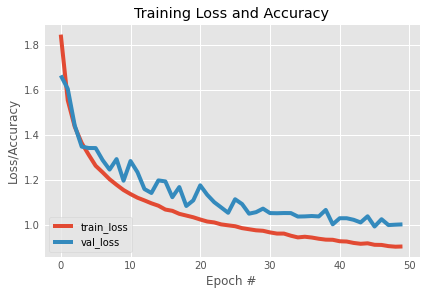

In [57]:
print("[INFO] serializing network...")

model.save("/content/drive/MyDrive/OCR with Keras and Tensorflow/pyimagesearch/Final_OCR.model", save_format="h5") # changed place

# construct a plot that plots and saves the training history
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("/content/drive/MyDrive/OCR with Keras and Tensorflow/pyimagesearch/Final_PLOT.png")

# images = []
# # randomly select a few testing characters
# for i in np.random.choice(np.arange(0, len(testY)), size=(49,)):
# 	# classify the character
# 	probs = model.predict(testX[np.newaxis, i])
# 	prediction = probs.argmax(axis=1)
# 	label = labelNames[prediction[0]]
# 	# extract the image from the test data and initialize the text
# 	# label color as green (correct)
# 	image = (testX[i] * 255).astype("uint8")
# 	color = (0, 255, 0)
# 	# otherwise, the class label prediction is incorrect
# 	if prediction[0] != np.argmax(testY[i]):
# 		color = (0, 0, 255)
# 	# merge the channels into one image, resize the image from 32x32
# 	# to 96x96 so we can better see it and then draw the predicted
# 	# label on the image
# 	image = cv2.merge([image] * 3)
# 	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
#     # cv2_imshow(image)
# 	cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,color, 2)
# 	# add the image to our list of output images
# 	images.append(image)
# # construct the montage for the images
# montage = build_montages(images, (96, 96), (7, 7))[0]
# # show the output montage

# cv2_imshow(montage)

# cv2.waitKey(0)


In [58]:
probs = model.predict(testX[np.newaxis, i])
prediction = probs.argmax(axis=1)
label = labelNames[prediction[0]]

In [59]:
print(prediction, label)

[0] 1


In [60]:
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=BS)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=labelNames))


[INFO] evaluating network...
              precision    recall  f1-score   support

           1       0.73      0.79      0.75      1181
           2       0.85      0.85      0.85      1188
           3       0.68      0.54      0.60      1232
           4       0.60      0.39      0.48      1274
           5       0.63      0.64      0.64      1179
           6       0.71      0.51      0.59      1230
           7       0.57      0.90      0.69      1123
           8       0.69      0.82      0.75      1217
           9       0.88      0.81      0.84      1189
           0       0.80      0.89      0.84      1187

    accuracy                           0.71     12000
   macro avg       0.71      0.71      0.70     12000
weighted avg       0.71      0.71      0.70     12000

